## Auswirkungen der unterschiedlichen Ladekurven/EVs auf den Lastverlauf

Nachdem die Simulation ansich vollständig funktionert, soll die Auswirkung der unterschiedlichen EVs auf den Lastverlauf untersucht werden. Dafür wird nacheinander mit einem spezifischen Fahrzeugtyp simuliert, und dann die Lastverläufe der einzelenen Durchläufe miteinander verglichen

In [2]:
import importlib
import numpy as np
import model_v2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## best Case

Schaut man sich die Ladekurven an fällt einem schnell auf, dass einige EVs gerade zu Beginn viel höhere Lastgänge aufweisen als andere. Die Vermutung liegt nahe, dass die Nutzung von bestimmten Modellen signifikante Auswirkungen auf das Simulationsergebnis hat.

Als erstes wird lediglich simuliert mit dem EV, was die geringste maximale Last hat: dem Hyundai KONA (max. ca. 75 kW)

In [4]:
importlib.reload(model_v2)

df_results_all_runs = pd.DataFrame()
df_results_single_row = pd.DataFrame()
anzahl_evs_gesamt = 0
anzahl_evs_abgewiesen_gesamt = 0

for i in range(100):
    importlib.reload(model_v2)
    new_column_name = f'power_run_{i}'
    df_results_returned, anzahl_evs, anzahl_evs_abgewiesen = model_v2.simulation("settings_auswirkung_ladekurven.json")
    df_results_all_runs[new_column_name] = df_results_returned.power_per_minute
    df_results_single_row = pd.concat([df_results_single_row, df_results_returned])
    anzahl_evs_gesamt = anzahl_evs_gesamt + anzahl_evs
    anzahl_evs_abgewiesen_gesamt = anzahl_evs_abgewiesen_gesamt + anzahl_evs_abgewiesen

df_results_single_row_KONA = df_results_single_row
print("Abgewiesene EVs gesamt: ", anzahl_evs_abgewiesen_gesamt)
print("Anzahl EVs gesamt: ", anzahl_evs_gesamt)

soc_begin:  gauss , [30.79202013]
soc_begin:  gauss , [42.82881972]
'Hyundai_KONA_64kWh' charged 30.25 kWh to 90.10 % SOC
'Hyundai_KONA_64kWh' charged 44.55 kWh to 100.39 % SOC
soc_begin:  gauss , [46.72100827]
soc_begin:  gauss , [31.13586063]
'Hyundai_KONA_64kWh' charged 34.47 kWh to 100.57 % SOC
'Hyundai_KONA_64kWh' charged 44.42 kWh to 100.54 % SOC
soc_begin:  gauss , [32.9541504]
soc_begin:  gauss , [30.81844787]
soc_begin:  gauss , [29.22053983]
'Hyundai_KONA_64kWh' charged 41.73 kWh to 98.16 % SOC
soc_begin:  gauss , [23.13405232]
'Hyundai_KONA_64kWh' charged 29.52 kWh to 75.35 % SOC
'Hyundai_KONA_64kWh' charged 37.06 kWh to 88.73 % SOC
soc_begin:  gauss , [27.73648153]
'Hyundai_KONA_64kWh' charged 36.89 kWh to 80.77 % SOC
soc_begin:  gauss , [50.62412475]
soc_begin:  gauss , [29.01327332]
soc_begin:  gauss , [38.67697326]
soc_begin:  gauss , [14.56863245]
Alle Ladesäulen belegt. Abgewiesene EVs:  1
'Hyundai_KONA_64kWh' charged 46.34 kWh to 100.14 % SOC
soc_begin:  gauss , [31.2

In [6]:
model_v2.auswertung(df_results_single_row_KONA)

Maximale Last:  299.5492068623993 kWh
Minuten über 60% der maximalen Last (179.73 kWh): 2035 Entsprechen  1.41 %
Minuten über 70% der maximalen Last (209.68 kWh): 743 Entsprechen  0.52 %
Minuten über 80% der maximalen Last (239.64 kWh): 196 Entsprechen  0.14 %
Minuten über 90% der maximalen Last (269.59 kWh): 52 Entsprechen  0.04 %
Minuten über 95% der maximalen Last (284.57 kWh): 13 Entsprechen  0.01 %


## worst case

Als nächstes wird der Worst-Case simuliert. Die höchsten Lastspitzen treten auf, wenn ein EV besonders hohe Ladeleistungen aufweist. Es wird folglich lediglich mit dem EV simuliert, welches die höchte Lastspitze hat: dem Porsche Taycan

In [3]:
importlib.reload(model_v2)

df_results_all_runs = pd.DataFrame()
df_results_single_row = pd.DataFrame()
anzahl_evs_gesamt = 0
anzahl_evs_abgewiesen_gesamt = 0

for i in range(100):
    importlib.reload(model_v2)
    new_column_name = f'power_run_{i}'
    df_results_returned, anzahl_evs, anzahl_evs_abgewiesen = model_v2.simulation("settings_auswirkung_ladekurven.json")
    df_results_all_runs[new_column_name] = df_results_returned.power_per_minute
    df_results_single_row = pd.concat([df_results_single_row, df_results_returned])
    anzahl_evs_gesamt = anzahl_evs_gesamt + anzahl_evs
    anzahl_evs_abgewiesen_gesamt = anzahl_evs_abgewiesen_gesamt + anzahl_evs_abgewiesen

df_results_single_row_taycan = df_results_single_row
print("Abgewiesene EVs gesamt: ", anzahl_evs_abgewiesen_gesamt)
print("Anzahl EVs gesamt: ", anzahl_evs_gesamt)

soc_begin:  gauss , [49.72191903]
soc_begin:  gauss , [35.08800148]
soc_begin:  gauss , [32.8703012]
'Porsche_Taycan' charged 61.23 kWh to 100.65 % SOC
soc_begin:  gauss , [45.88606952]
'Porsche_Taycan' charged 63.46 kWh to 100.81 % SOC
soc_begin:  gauss , [8.534617]
'Porsche_Taycan' charged 51.18 kWh to 100.68 % SOC
'Porsche_Taycan' charged 47.58 kWh to 100.67 % SOC
soc_begin:  gauss , [26.83448984]
'Porsche_Taycan' charged 86.04 kWh to 100.66 % SOC
soc_begin:  gauss , [43.04119549]
soc_begin:  gauss , [27.19288486]
soc_begin:  gauss , [33.6809166]
'Porsche_Taycan' charged 53.93 kWh to 100.78 % SOC
'Porsche_Taycan' charged 68.61 kWh to 100.65 % SOC
'Porsche_Taycan' charged 68.98 kWh to 100.68 % SOC
soc_begin:  gauss , [19.5475572]
soc_begin:  gauss , [51.50842718]
soc_begin:  gauss , [30.33038181]
'Porsche_Taycan' charged 62.52 kWh to 100.62 % SOC
'Porsche_Taycan' charged 35.51 kWh to 89.53 % SOC
soc_begin:  gauss , [31.36729795]
'Porsche_Taycan' charged 65.66 kWh to 100.63 % SOC
'Por

In [5]:
model_v2.auswertung(df_results_single_row_taycan)

Maximale Last:  745.5617691916624 kWh
Minuten über 60% der maximalen Last (447.34 kWh): 881 Entsprechen  0.61 %
Minuten über 70% der maximalen Last (521.89 kWh): 231 Entsprechen  0.16 %
Minuten über 80% der maximalen Last (596.45 kWh): 75 Entsprechen  0.05 %
Minuten über 90% der maximalen Last (671.01 kWh): 9 Entsprechen  0.01 %
Minuten über 95% der maximalen Last (708.28 kWh): 6 Entsprechen  0.00 %


## Alle Modelle

Um die Ergebnisse vergleichen zu können, wird im Folgenden mit allen Modellen simuliert. Die Auswahl der Modelle erfolgt dabei zufällig.

In [7]:
importlib.reload(model_v2)

df_results_all_runs = pd.DataFrame()
df_results_single_row = pd.DataFrame()
anzahl_evs_gesamt = 0
anzahl_evs_abgewiesen_gesamt = 0

for i in range(100):
    importlib.reload(model_v2)
    new_column_name = f'power_run_{i}'
    df_results_returned, anzahl_evs, anzahl_evs_abgewiesen = model_v2.simulation("settings_auswirkung_ladekurven.json")
    df_results_all_runs[new_column_name] = df_results_returned.power_per_minute
    df_results_single_row = pd.concat([df_results_single_row, df_results_returned])
    anzahl_evs_gesamt = anzahl_evs_gesamt + anzahl_evs
    anzahl_evs_abgewiesen_gesamt = anzahl_evs_abgewiesen_gesamt + anzahl_evs_abgewiesen

df_results_single_row_allModels = df_results_single_row
print("Abgewiesene EVs gesamt: ", anzahl_evs_abgewiesen_gesamt)
print("Anzahl EVs gesamt: ", anzahl_evs_gesamt)

soc_begin:  gauss , [29.06571453]
soc_begin:  gauss , [41.62624316]
soc_begin:  gauss , [36.23299647]
'Hyundai_IONIQ5_LongRange' charged 45.93 kWh to 92.33 % SOC
soc_begin:  gauss , [52.19465615]
soc_begin:  gauss , [41.58705436]
'Hyundai_IONIQ5_LongRange' charged 34.26 kWh to 99.38 % SOC
'Tesla_ModelY' charged 47.89 kWh to 100.03 % SOC
soc_begin:  gauss , [22.30920319]
'Tesla_Model3_LR' charged 52.88 kWh to 100.33 % SOC
soc_begin:  gauss , [33.8390502]
'Tesla_Model_SX_LR' charged 62.98 kWh to 85.29 % SOC
soc_begin:  gauss , [27.37472759]
'Hyundai_IONIQ5_LongRange' charged 42.48 kWh to 100.10 % SOC
soc_begin:  gauss , [15.70981302]
'Tesla_Model_SX_LR' charged 66.52 kWh to 100.35 % SOC
soc_begin:  gauss , [33.94760829]
'2021_FIAT_500e_Hatchback' charged 34.30 kWh to 97.38 % SOC
'Porsche_Taycan' charged 68.48 kWh to 100.70 % SOC
'Porsche_Taycan' charged 62.29 kWh to 100.64 % SOC
soc_begin:  gauss , [44.35223087]
soc_begin:  gauss , [40.15777285]
'2021_FIAT_500e_Hatchback' charged 24.20 k

In [8]:
model_v2.auswertung(df_results_single_row_allModels)

Maximale Last:  709.3466208162101 kWh
Minuten über 60% der maximalen Last (425.61 kWh): 152 Entsprechen  0.11 %
Minuten über 70% der maximalen Last (496.54 kWh): 39 Entsprechen  0.03 %
Minuten über 80% der maximalen Last (567.48 kWh): 10 Entsprechen  0.01 %
Minuten über 90% der maximalen Last (638.41 kWh): 3 Entsprechen  0.00 %
Minuten über 95% der maximalen Last (673.88 kWh): 1 Entsprechen  0.00 %


## Vergleich der Lastverläufe

Um die zuvor simulierten Lastverläufe zu vergleichen, wird ein ECDF-Plot von den Simulationsergebnissen angefertigt:

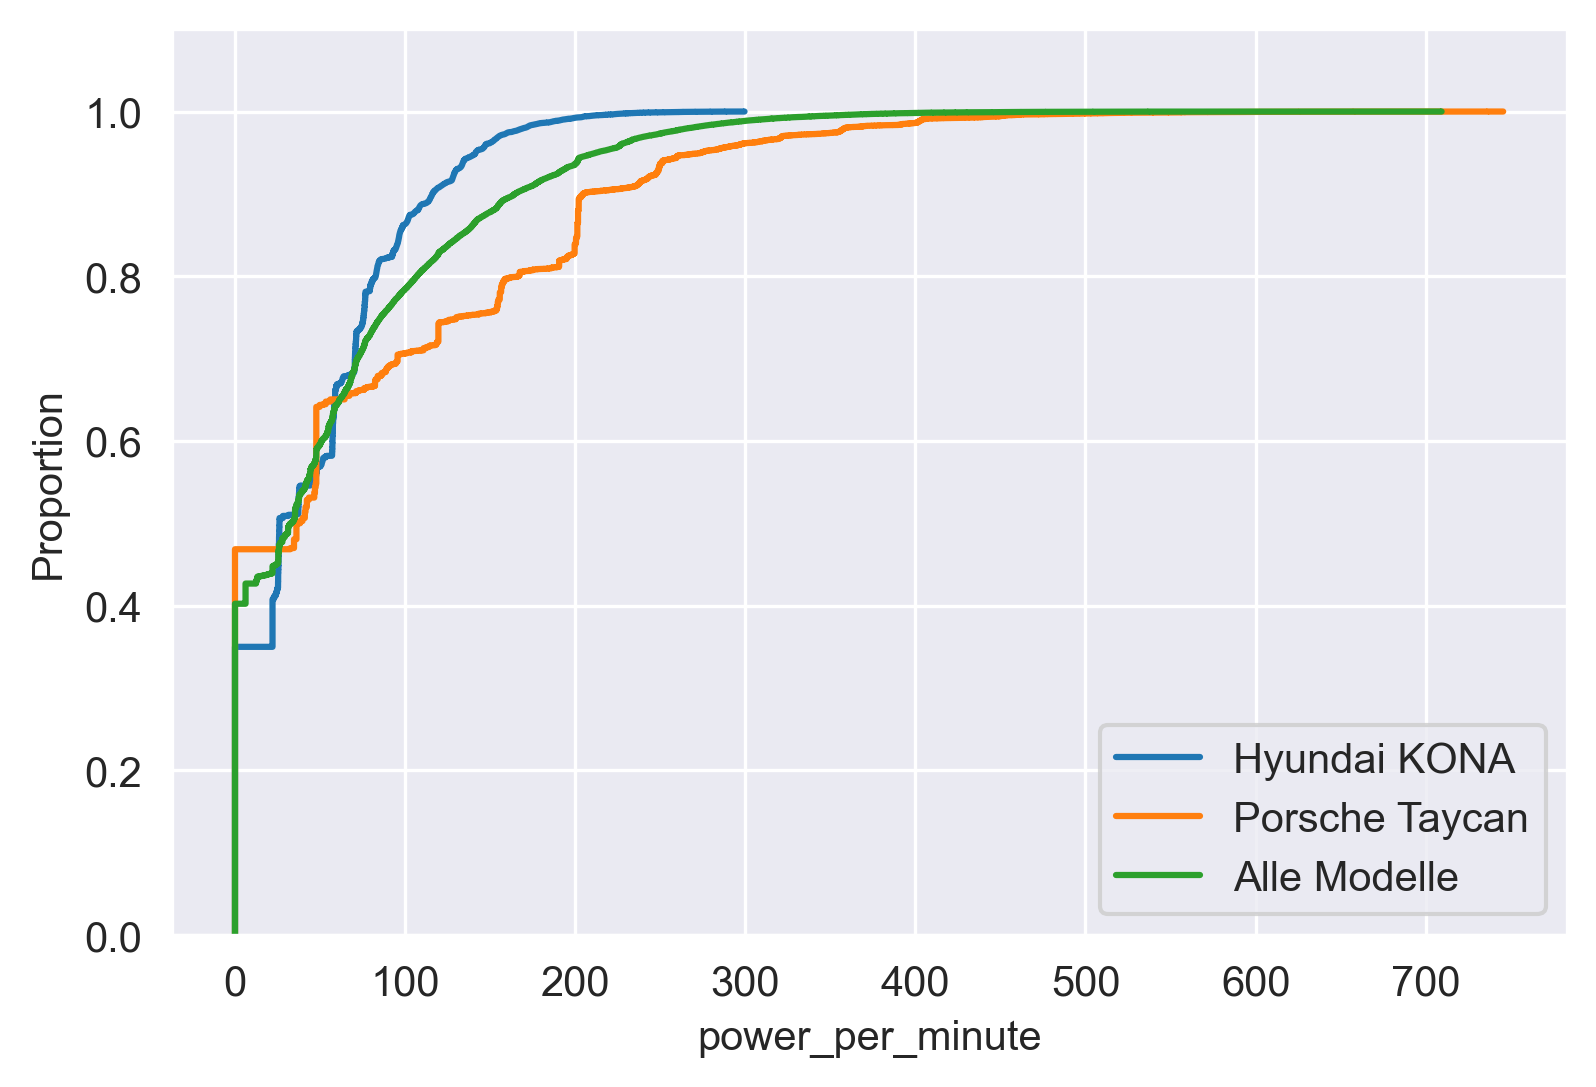

In [11]:
plt.figure(dpi=300)
#plt.figure(figsize=(9, 6))

sns.ecdfplot(data=df_results_single_row_KONA, x="power_per_minute", label="Hyundai KONA")
sns.ecdfplot(data=df_results_single_row_taycan, x="power_per_minute", label = "Porsche Taycan")
sns.ecdfplot(data=df_results_single_row_allModels, x="power_per_minute", label="Alle Modelle")

plt.ylim(0, 1.1)
plt.legend()
plt.show()

<Figure size 1800x1200 with 0 Axes>

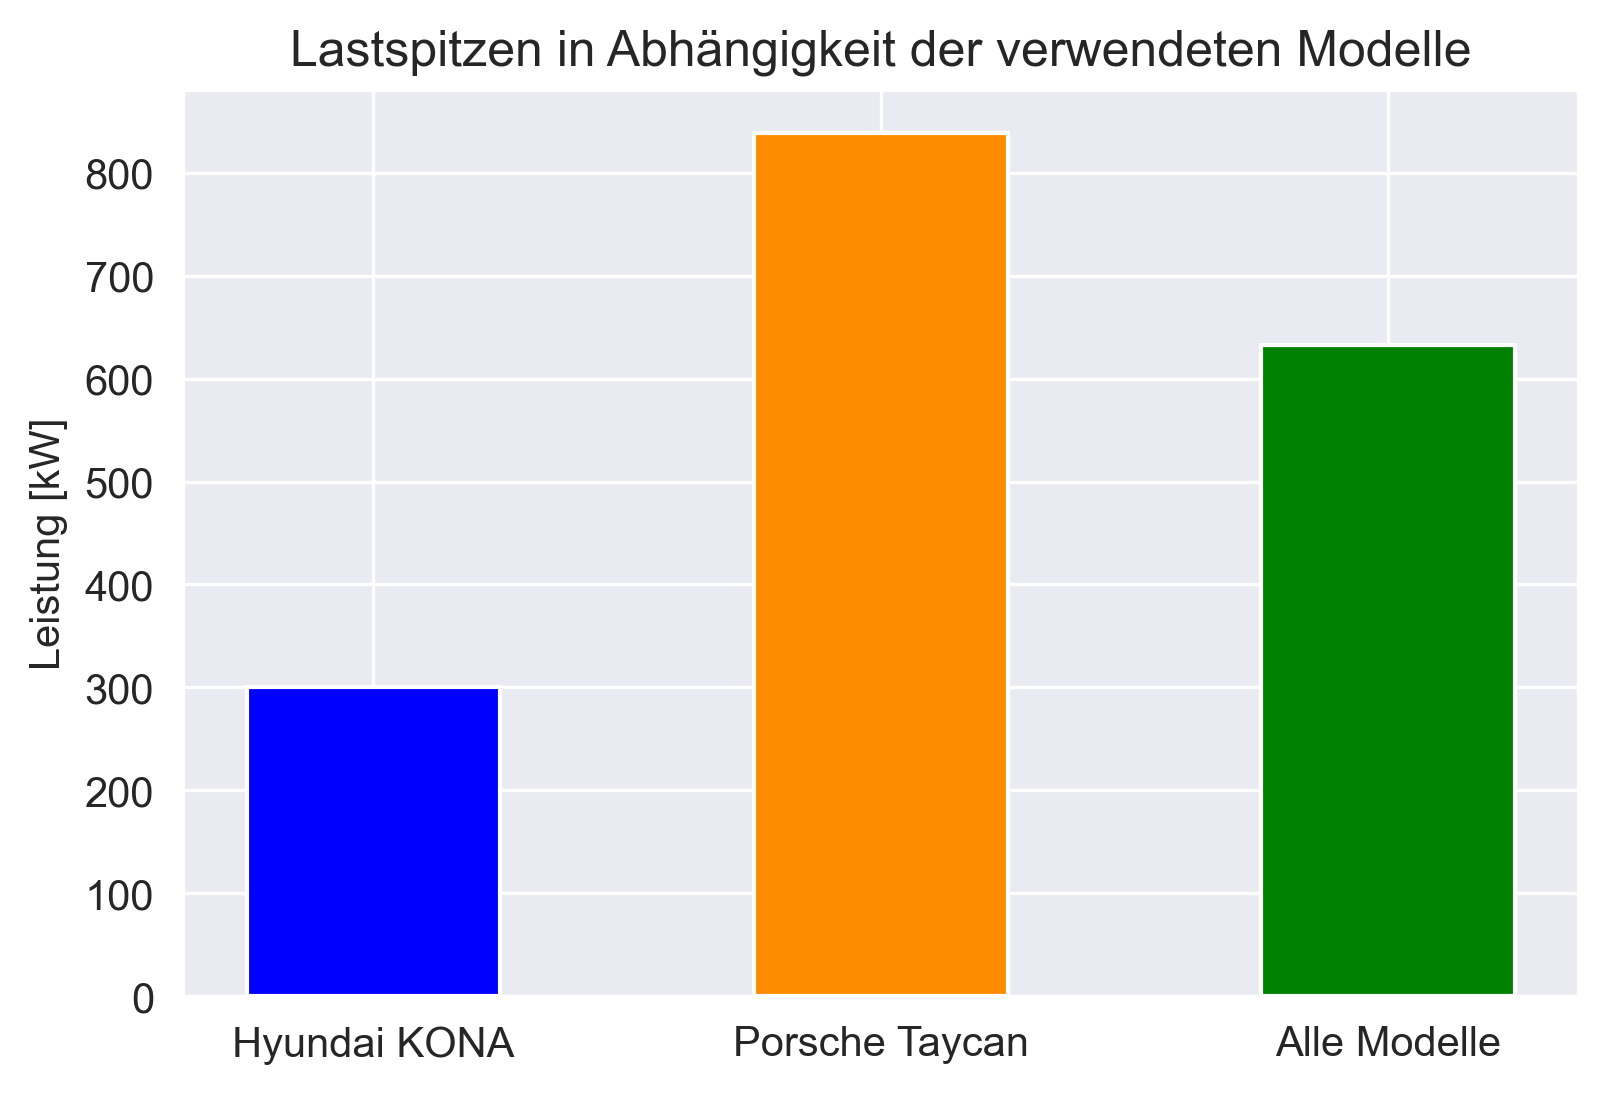

In [10]:
import matplotlib.pyplot as plt

plt.figure(dpi=300)
# fig = plt.figure(figsize = (6, 4))
# Daten für die Balken
categories = ['Hyundai KONA', 'Porsche Taycan', 'Alle Modelle']
values = [300, 838, 633]

# Balkendiagramm erstellen
plt.figure(dpi=300)
plt.bar(categories, values, color=['blue', 'darkorange', 'green'], width = 0.5)

# Diagramm beschriften
plt.title('Lastspitzen in Abhängigkeit der verwendeten Modelle')
#plt.xlabel('EV Modelle')
plt.ylabel('Leistung [kW]')

# Diagramm anzeigen
plt.show()
